In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split

In [15]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

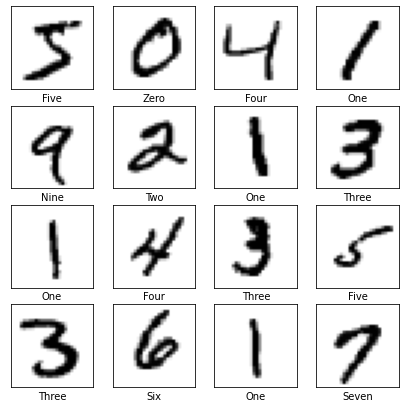

In [17]:
plt.figure( figsize = (7,7) )

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

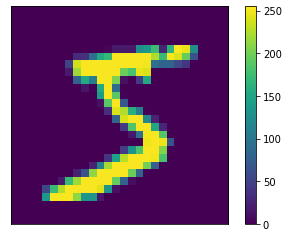

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [18]:
model = tensorflow.keras.models.Sequential([
  tensorflow.keras.layers.Flatten(input_shape = (28, 28)),
  tensorflow.keras.layers.Dense(300, activation = 'sigmoid'),
  tensorflow.keras.layers.Dense(10, activation = 'softmax')
])

In [19]:
model.compile ( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [20]:
results = model.fit ( train_images, train_labels, epochs = 10, batch_size = 1000 )

Epoch 1/10
60/60 [==============================] - 2s 26ms/step - loss: 0.7168 - accuracy: 0.8020
Epoch 2/10
60/60 [==============================] - 1s 25ms/step - loss: 0.3174 - accuracy: 0.9141
Epoch 3/10
60/60 [==============================] - 2s 29ms/step - loss: 0.2559 - accuracy: 0.9299
Epoch 4/10
60/60 [==============================] - 2s 28ms/step - loss: 0.2231 - accuracy: 0.9388
Epoch 5/10
60/60 [==============================] - 2s 29ms/step - loss: 0.1999 - accuracy: 0.9449
Epoch 6/10
60/60 [==============================] - 2s 28ms/step - loss: 0.1830 - accuracy: 0.9485
Epoch 7/10
60/60 [==============================] - 2s 28ms/step - loss: 0.1717 - accuracy: 0.9531
Epoch 8/10
60/60 [==============================] - 2s 29ms/step - loss: 0.1627 - accuracy: 0.9545
Epoch 9/10
60/60 [==============================] - 2s 33ms/step - loss: 0.1517 - accuracy: 0.9571
Epoch 10/10
60/60 [==============================] - 2s 30ms/step - loss: 0.1428 - accuracy: 0.9596


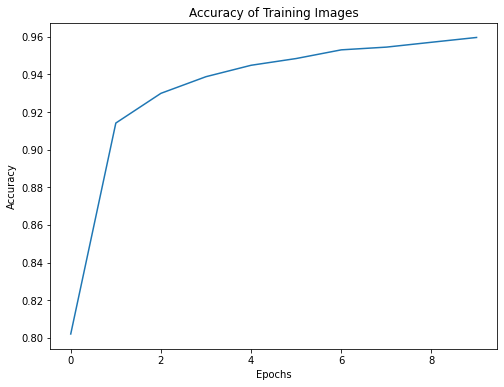

In [22]:
plt.figure(figsize = (8, 6))

plt.plot(results.history['accuracy'])
plt.title("Accuracy of Training Images")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [23]:
predictions = model.predict ( test_images )

In [24]:
predicted_labels = np.argmax ( predictions, axis = -1 )

In [26]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score ( test_labels, predicted_labels )
print(test_accuracy)

0.9545
